In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import shap

from lib import BlackFridayDataset

In [3]:
dataset = BlackFridayDataset('data/train.csv', 'data/test.csv')
dataset.preprocess_dfs(return_res=False)
X_train, y_train, X_val, y_val, X_test = dataset.prepare_features_and_target(test_size=0.2, shuffle=True)

In [4]:
model = XGBRegressor(
    n_estimators=300,
    objective='reg:squarederror',
    eval_metric='rmse',
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    seed=0
)

In [5]:
model = model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=50
)

[0]	validation_0-rmse:4841.11634
[50]	validation_0-rmse:3391.79866
[100]	validation_0-rmse:3331.78340
[150]	validation_0-rmse:3306.68668
[200]	validation_0-rmse:3292.82683
[250]	validation_0-rmse:3284.01578
[299]	validation_0-rmse:3278.21052


In [7]:
y_pred = model.predict(X_test)

In [8]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

100%|===================| 233523/233599 [16:25<00:00]        

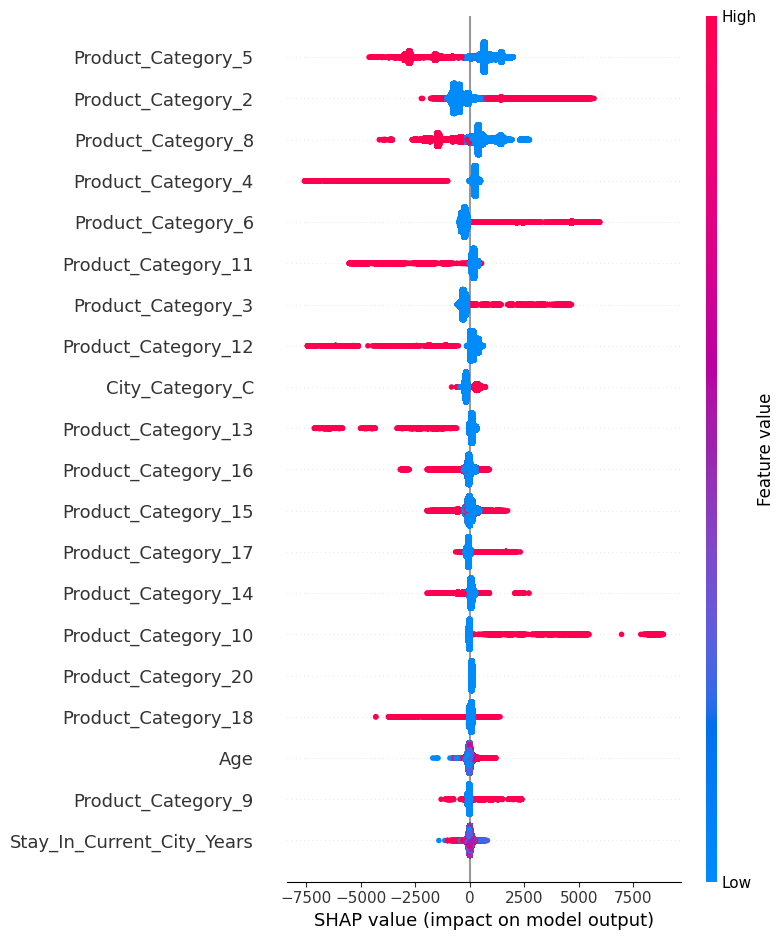

In [9]:
shap.summary_plot(shap_values, X_test)